<a href="https://colab.research.google.com/github/Randyapr/TugasBesarP.AI/blob/main/TB_P_AI_Kel03_Pred_HargaSaham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediksi Saham PTBA PERBULAN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Pengumpulan data

In [ ]:
# Membaca dataset
data = pd.read_csv('Data Historis PTBA.csv')

In [ ]:
# Mengubah kolom tanggal menjadi tipe data datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y')

In [ ]:
print(data)

      Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah     Vol. Perubahan%
0  2023-05-01      3.06       3.86       3.86      2.84   28,57M    -26,09%
1  2023-04-01      4.14       4.00       4.20      3.92   18,43M      3,76%
2  2023-03-01      3.99       3.86       4.02      3.64  471,44M      3,37%
3  2023-02-01      3.86       3.40       3.87      3.25  319,20M     13,53%
4  2023-01-01      3.40       3.69       3.74      3.24  269,60M     -7,86%
5  2022-12-01      3.69       3.82       3.85      3.61  241,89M     -2,89%
6  2022-11-01      3.80       3.88       3.88      3.43  537,61M     -2,81%
7  2022-10-01      3.91       4.15       4.33      3.69  873,56M     -6,24%
8  2022-09-01      4.17       4.25       4.53      4.07  601,74M     -1,88%
9  2022-08-01      4.25       4.30       4.51      4.01  829,73M     -1,16%
10 2022-07-01      4.30       3.82       4.35      3.62  694,81M     12,57%
11 2022-06-01      3.82       4.55       4.63      3.68    1,76B    -15,67%
12 2022-05-0

Petsiapan

In [ ]:
data.shape

(23, 7)

In [ ]:
data.isnull().sum()

Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64

Pemodelan dan Training

In [ ]:
# Memisahkan (tanggal) dan target (harga penutupan)
X = data['Tanggal'].values.astype(np.int64) // 10**9
y = data['Terakhir'].values.astype(np.int64)

Bagi Bagi

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modeling

In [ ]:
# Membuat objek model regresi linier
model = LinearRegression()

In [ ]:
# Melatih model menggunakan data latih
model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

Evaluasi

In [ ]:
# Memprediksi harga penutupan menggunakan data uji
y_pred = model.predict(X_test.reshape(-1, 1))

In [ ]:
# Menghitung nilai Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5272444381064851


Prediksi

In [ ]:
terakhir_price = data['Terakhir'].iloc[-1]
future_harga = [terakhir_price * (1 + i/100) for i in range(1, 11)]

# Prediksi harga saham di masa depan
tgl = pd.date_range(start=data['Tanggal'].max(), periods=10, freq='M')

In [ ]:
predictions_df = pd.DataFrame({'Tanggal': tgl, 'Prediksi Harga': future_harga})
print("\nPrediksi Harga Saham di Masa Depan:")
print(predictions_df)


Prediksi Harga Saham di Masa Depan:
     Tanggal  Prediksi Harga
0 2023-05-31          2.2523
1 2023-06-30          2.2746
2 2023-07-31          2.2969
3 2023-08-31          2.3192
4 2023-09-30          2.3415
5 2023-10-31          2.3638
6 2023-11-30          2.3861
7 2023-12-31          2.4084
8 2024-01-31          2.4307
9 2024-02-29          2.4530


In [ ]:
# Mendapatkan koefisien kemiringan dan intersep dari model regresi linear
slope = model.coef_[0]
intercept = model.intercept_

In [ ]:
# Menghitung prediksi harga menggunakan fungsi linier
y_regression = slope * X + intercept

Visualisasi

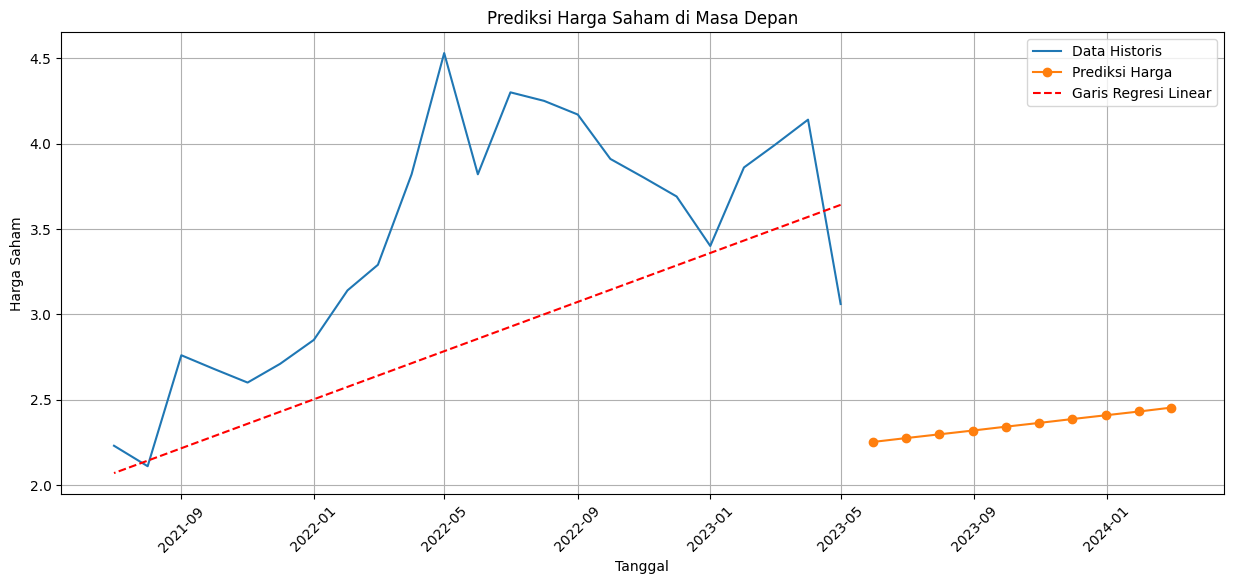

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(data['Tanggal'], data['Terakhir'], label='Data Historis')
plt.plot(predictions_df['Tanggal'], predictions_df['Prediksi Harga'], marker='o', linestyle='-', label='Prediksi Harga')
plt.plot(data['Tanggal'], y_regression, color='red', linestyle='--', label='Garis Regresi Linear')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.title('Prediksi Harga Saham di Masa Depan')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()